In [1]:
using MLJ
@load LinearRegressor pkg=MLJLinearModels

LinearRegressor(
    fit_intercept = true,
    solver = nothing) @109

In [2]:
import RDatasets: dataset
import DataFrames: describe, select, Not, rename!
boston = dataset("MASS", "Boston")
first(boston, 3)

,Crim,Zn,Indus,Chas,NOx,Rm,Age,Dis,Rad,Tax
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Int64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242


In [3]:
describe(boston, :mean, :std, :eltype)

,variable,mean,std,eltype
,Symbol,Float64,Float64,DataType
1,Crim,3.61352,8.60155,Float64
2,Zn,11.3636,23.3225,Float64
3,Indus,11.1368,6.86035,Float64
4,Chas,0.06917,0.253994,Int64
5,NOx,0.554695,0.115878,Float64
6,Rm,6.28463,0.702617,Float64
7,Age,68.5749,28.1489,Float64
8,Dis,3.79504,2.10571,Float64
9,Rad,9.54941,8.70726,Int64


In [4]:
mdl = LinearRegressor()

LinearRegressor(
    fit_intercept = true,
    solver = nothing) @496

In [5]:
data = coerce(boston, autotype(boston, :discrete_to_continuous));

In [6]:
y = data.MedV
X = select(data, Not(:MedV));

In [7]:
X_uni = select(X, :LStat) 
mach_uni = machine(mdl, X_uni, y)
fit!(mach_uni)

┌ Info: Training Machine{LinearRegressor} @536.
└ @ MLJBase /home/angicia/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{LinearRegressor} @536 trained 1 time.
  args: 
    1:	Source @649 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @895 ⏎ `AbstractArray{Continuous,1}`


In [8]:
fp = fitted_params(mach_uni)
@show fp.coefs
@show fp.intercept

fp.coefs = [:LStat => -0.950049353757991]
fp.intercept = 34.553840879383095


34.553840879383095

In [9]:
fp.coefs = [:LStat => -0.950049353757991]
fp.intercept = 34.553840879383095

ErrorException: setfield! immutable struct of type NamedTuple cannot be changed

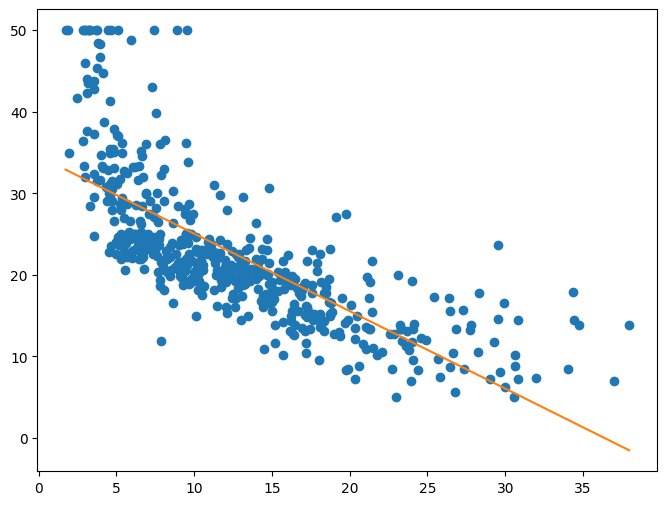

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8633dbadc0>

In [10]:
using PyPlot

figure(figsize=(8,6))
plot(X.LStat, y, ls="none", marker="o")
Xnew = (LStat = collect(range(extrema(X.LStat)..., length=100)),)
plot(Xnew.LStat, predict(mach_uni, Xnew))